# Prior Knowledge

## 準備

In [1]:
import numpy as np
import pandas as pd
import graphviz
import lingam
from lingam.utils import make_prior_knowledge, make_dot
import warnings


# warningを非表示
warnings.filterwarnings('ignore')

# numpyは小数第3位まで表示
np.set_printoptions(precision=3, suppress=True)

# 乱数を設定
np.random.seed(0)

## ユーティリティ

In [2]:
# 事前知識に対して取りうる因果構造をプロットする関数（cdt/lingam準拠）
def make_prior_knowledge_graph(prior_knowledge_matrix):
    d = graphviz.Digraph(engine='dot')
    
    labels = [f'x{i}' for i in range(prior_knowledge_matrix.shape[0])]
    for label in labels:
        d.node(label, label)

    dirs = np.where(prior_knowledge_matrix > 0)
    for to, from_ in zip(dirs[0], dirs[1]):
        d.edge(labels[from_], labels[to])

    dirs = np.where(prior_knowledge_matrix < 0)
    for to, from_ in zip(dirs[0], dirs[1]):
        if to != from_:
            d.edge(labels[from_], labels[to], style='dashed')
    return d

## テストデータ

In [3]:
# 各変数ごとにデータ生成
x3 = np.random.uniform(size=10000)
x0 = 3.0*x3 + np.random.uniform(size=10000)
x2 = 6.0*x3 + np.random.uniform(size=10000)
x1 = 3.0*x0 + 2.0*x2 + np.random.uniform(size=10000)
x5 = 4.0*x0 + np.random.uniform(size=10000)
x4 = 8.0*x0 - 1.0*x2 + np.random.uniform(size=10000)

# DataFrameとして格納
X = pd.DataFrame(np.array([x0, x1, x2, x3, x4, x5]).T ,columns=['x0', 'x1', 'x2', 'x3', 'x4', 'x5'])

## 事前知識を表現する隣接行列

In [4]:
# 事前知識を表現する隣接行列を計算
# ここでは6変数でインデックスが[0,1,4]（=x0,x1,x4）が因果構造の葉であることを既知としている
prior_knowledge = make_prior_knowledge(
    n_variables=6,
    sink_variables=[0, 1, 4],
)
print(prior_knowledge)

[[-1  0 -1 -1  0 -1]
 [ 0 -1 -1 -1  0 -1]
 [ 0  0 -1 -1  0 -1]
 [ 0  0 -1 -1  0 -1]
 [ 0  0 -1 -1 -1 -1]
 [ 0  0 -1 -1  0 -1]]


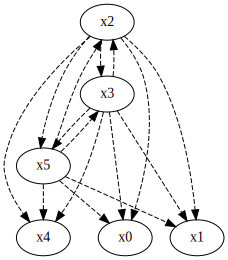

In [5]:
# 事前知識を踏まえた取りうる因果構造を描写
make_prior_knowledge_graph(prior_knowledge)

## 因果探索

In [6]:
# DirectLiNGAMのオブジェクト（事前知識を入力）
model = lingam.DirectLiNGAM(prior_knowledge=prior_knowledge)

# 学習
model.fit(X)

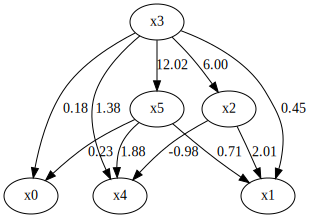

In [7]:
# 事前知識を入力したDirectLiNGAMの推定結果を表示
make_dot(model.adjacency_matrix_)

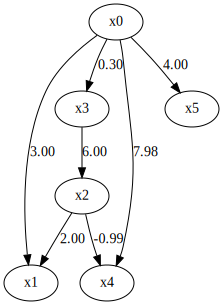

In [8]:
# 事前知識を表現する隣接行列を計算
# ここでは6変数でインデックスが[0]（=x0）が因果構造の根であることを既知としている
prior_knowledge = make_prior_knowledge(
    n_variables=6,
    exogenous_variables=[0],
)

# DirectLiNGAMのオブジェクト（事前知識を入力）
model = lingam.DirectLiNGAM(prior_knowledge=prior_knowledge)

# 学習
model.fit(X)

# 事前知識を入力したDirectLiNGAMの推定結果を表示
make_dot(model.adjacency_matrix_)